### Loading Dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/annmarysebastian/Desktop/LiveBetter/Dataset/data.csv')

In [3]:
data.head(5)

,loc,lat,lng,Arrest Count,restaurant,school,bus_station,atm,supermarket,park,gym,hospital,hike trail,bike trail
0,"36.62,-91.69",36.62,-91.69,41.0,0,0,0,0,0,0,0,0,0,0
1,"41.64,-87.54",41.64,-87.54,1.0,12,1,2,5,0,13,1,0,1,1
2,"41.64,-87.57",41.64,-87.57,0.0,12,4,0,8,0,11,2,1,2,1
3,"41.64,-87.59",41.64,-87.59,0.0,7,3,0,7,0,4,1,1,2,1
4,"41.64,-87.6",41.64,-87.60,2.0,9,17,0,10,1,3,3,0,1,2


### Examining Features

In [4]:
data.columns

Index(['loc', 'lat', 'lng', 'Arrest Count', 'restaurant', 'school',
       'bus_station', 'atm', 'supermarket', 'park', 'gym', 'hospital',
       'hike trail', 'bike trail'],
      dtype='object')

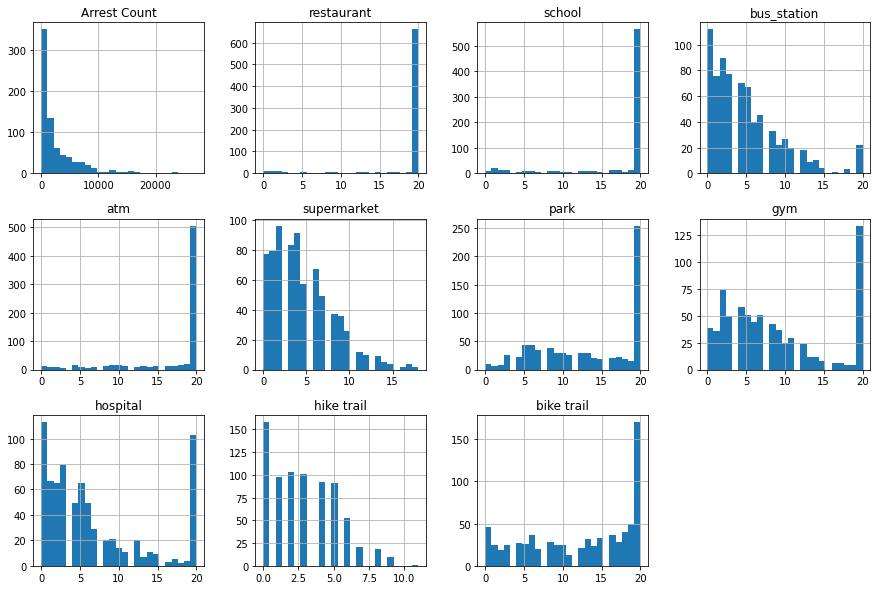

In [5]:
features_list = ['Arrest Count', 'restaurant', 'school','bus_station', 'atm', 'supermarket', 'park', 'gym', 'hospital','hike trail', 'bike trail']

axes = data[features_list].hist(bins=25, layout=(3,4), figsize=(15,10))

In [6]:
# Examining the above histograms gives an understanding of how the features are spread acroos the dataset.

### Applying weights to different features

In [7]:
weights = pd.DataFrame()

In [8]:
def set_safeWeight(row):
    safeWeight = row['Arrest Count'] / 100.0
    if (safeWeight >= 1):
        safeWeight = 1.0 
    safeWeight = 1 - safeWeight
    return safeWeight

In [9]:
def set_atmWeight(row):
    atmWeight = row['atm'] / 20.0
    if (atmWeight >= 1):
        atmWeight = 1.0 
    return atmWeight

In [10]:
def set_bikeWeight(row):
    bikeWeight = row['bike trail'] / 5.0
    if (bikeWeight >= 1):
        bikeWeight = 1.0 
    return bikeWeight

In [11]:
def set_busWeight(row):
    busWeight = row['bus_station'] / 10.0
    if (busWeight >= 1):
        busWeight = 1.0 
    return busWeight

In [12]:
def set_gymWeight(row):
    gymWeight = row['gym'] / 10.0
    if (gymWeight >= 1):
        gymWeight = 1.0 
    return gymWeight

In [13]:
def set_hikeWeight(row):
    hikeWeight = row['hike trail'] / 5.0
    if (hikeWeight >= 1):
        hikeWeight = 1.0 
    return hikeWeight

In [14]:
def set_hospitalWeight(row):
    hospitalWeight = round(row['hospital'] / 3.0,1)
    if (hospitalWeight >= 1):
        hospitalWeight = 1.0 
    return hospitalWeight

In [15]:
def set_restaurantWeight(row):
    restaurantWeight = row['restaurant'] / 20.0
    if (restaurantWeight >= 1):
        restaurantWeight = 1.0 
    return restaurantWeight

In [16]:
def set_supermarketWeight(row):
    supermarketWeight = row['supermarket'] / 10.0
    if (supermarketWeight >= 1):
        supermarketWeight = 1.0 
    return supermarketWeight

In [17]:
def set_schoolWeight(row):
    schoolWeight = row['school'] / 20.0
    if (schoolWeight >= 1):
        schoolWeight = 1.0 
    return schoolWeight

In [18]:
def set_parkWeight(row):
    parkWeight = row['park'] / 5.0
    if (parkWeight >= 1):
        parkWeight = 1.0 
    return parkWeight

In [19]:
data['safeWeight'] = data.apply(set_safeWeight, axis=1)
data['atmWeight'] = data.apply(set_atmWeight, axis=1)
data['bikeWeight'] = data.apply(set_bikeWeight, axis=1)
data['busWeight'] = data.apply(set_busWeight, axis=1)
data['gymWeight'] = data.apply(set_gymWeight, axis=1)
data['hikeWeight'] = data.apply(set_hikeWeight, axis=1)
data['hospitalWeight'] = data.apply(set_hospitalWeight, axis=1)
data['restaurantWeight'] = data.apply(set_restaurantWeight, axis=1)
data['supermarketWeight'] = data.apply(set_supermarketWeight, axis=1)
data['schoolWeight'] = data.apply(set_schoolWeight, axis=1)
data['parkWeight'] = data.apply(set_parkWeight, axis=1)

In [20]:
def set_scores(row):
    score = ((row['Arrest Count']*row['safeWeight']) + # penalize by 1.5 times
             (row['restaurant']*row['atmWeight'])+
             (row['school']*row['bikeWeight'])+
             (row['bus_station']*row['busWeight'])+
             (row['atm']*row['gymWeight'])+
             (row['supermarket']*row['hikeWeight'])+
             (row['park']*row['hospitalWeight'])+  # penalize by 1 times
             (row['gym']*row['restaurantWeight'])+
             (row['hospital']*row['supermarketWeight'])+
             (row['hike trail']*row['schoolWeight'])+
             (row['bike trail']*row['parkWeight']))
    return score

In [21]:
data['scores'] = data.apply(set_scores, axis=1)

### Scaling Scores

In [26]:
data['scaled_scores'] = data['scores']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
data['scaled_scores'] = scaler.fit_transform(data[["scaled_scores"]])

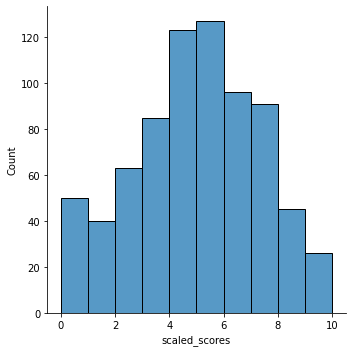

In [28]:
sns.displot(data['scaled_scores'], bins=10)